# Medellin Poster Map

In this data vizualisation, I create a poster map of Medellin Street with blue dark background following this [tutorial](https://towardsdatascience.com/creating-beautiful-maps-with-python-6e1aae54c55c)

**Before running the code for the first time**:
- OSMnx Python package: will let us download spatial data from OpenStreetMap
- install the osmnx package with the following conda command<br>

`conda create -n ox -c `<br>
`conda-forge --strict-channel-priority osmnx`<br>
`conda activate ox`


- to use with jupyter notebook, in the terminal run<br>

`conda config --prepend channels conda-forge`<br>
`conda create -n ox --strict-channel-priority osmnx jupyterlab`<br>
`conda activate ox`<br>
`python -m ipykernel install --user --name ox --display-name "Python (ox)"
jupyter lab`

## Downloading street network

In [6]:
import osmnx as ox

==> Use `graph_from_point` function

In [13]:

#Medellin, Colombia
center_point = (6.248621149296176, -75.57367358921249)
G = ox.graph_from_point(center_point, dist=15000, retain_all=True, simplify = True, network_type='all')



## Unpack data

In [14]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

 We iterate over data and add colors. A cool feature: we can color it and adjust linewidths base on street lengths!

In [16]:
# Lists to store colors and widths 
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.35
        else:
            color = "#d5d5d5"
            linewidth = 0.45

        if "primary" in item["highway"]:
            linewidth = 0.5
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

## Plot and save the map

To plot the map we need:
1. Identify the **center of the map**: choose the gps coordinates where you want to be the center.
2. Add **borders and background color**: bgcolor. north, south, eastand west. Note1: This coordinates will crop the image base on these boundaries, just increase the boundaries in you want a bigger map. Note2: Take into account that if you are using graph_from_point() method you will need to increase the dist value base on your needs.
3.  For **background color**, in line with work by this [tutorial](https://towardsdatascience.com/creating-beautiful-maps-with-python-6e1aae54c55c) on towardsdatascience, I am choosing a blue a dark blue #061529, to simulate a blueprint. 
4. **Plot and save the map** it is recommended to use fig.tight_layout(pad=0) to adjust the plot params so that subplots are nicely fit.

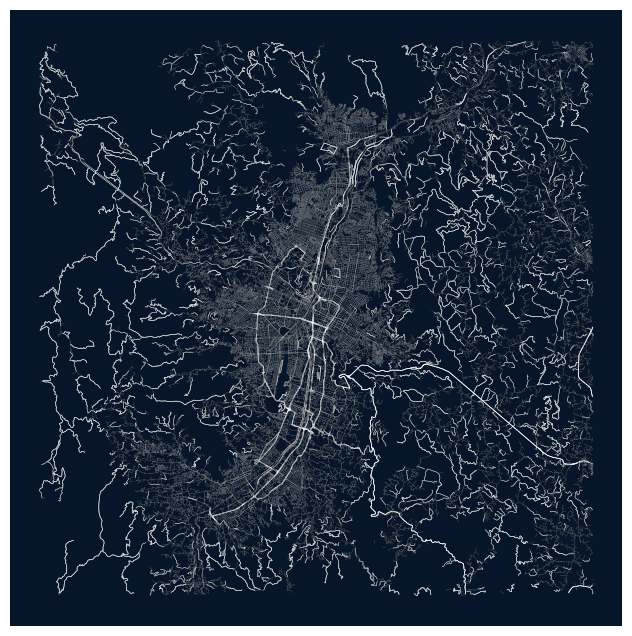

In [17]:
#Center of the map  Medellin
latitude = 6.248621149296176
longitude = -75.57367358921249

#Limit borders 
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15

bgcolor = "#061529"

fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)

fig.savefig("medellin.png", dpi=300, bbox_inches='tight', format="png", 
            facecolor=fig.get_facecolor(), transparent=False)

## Poster image size

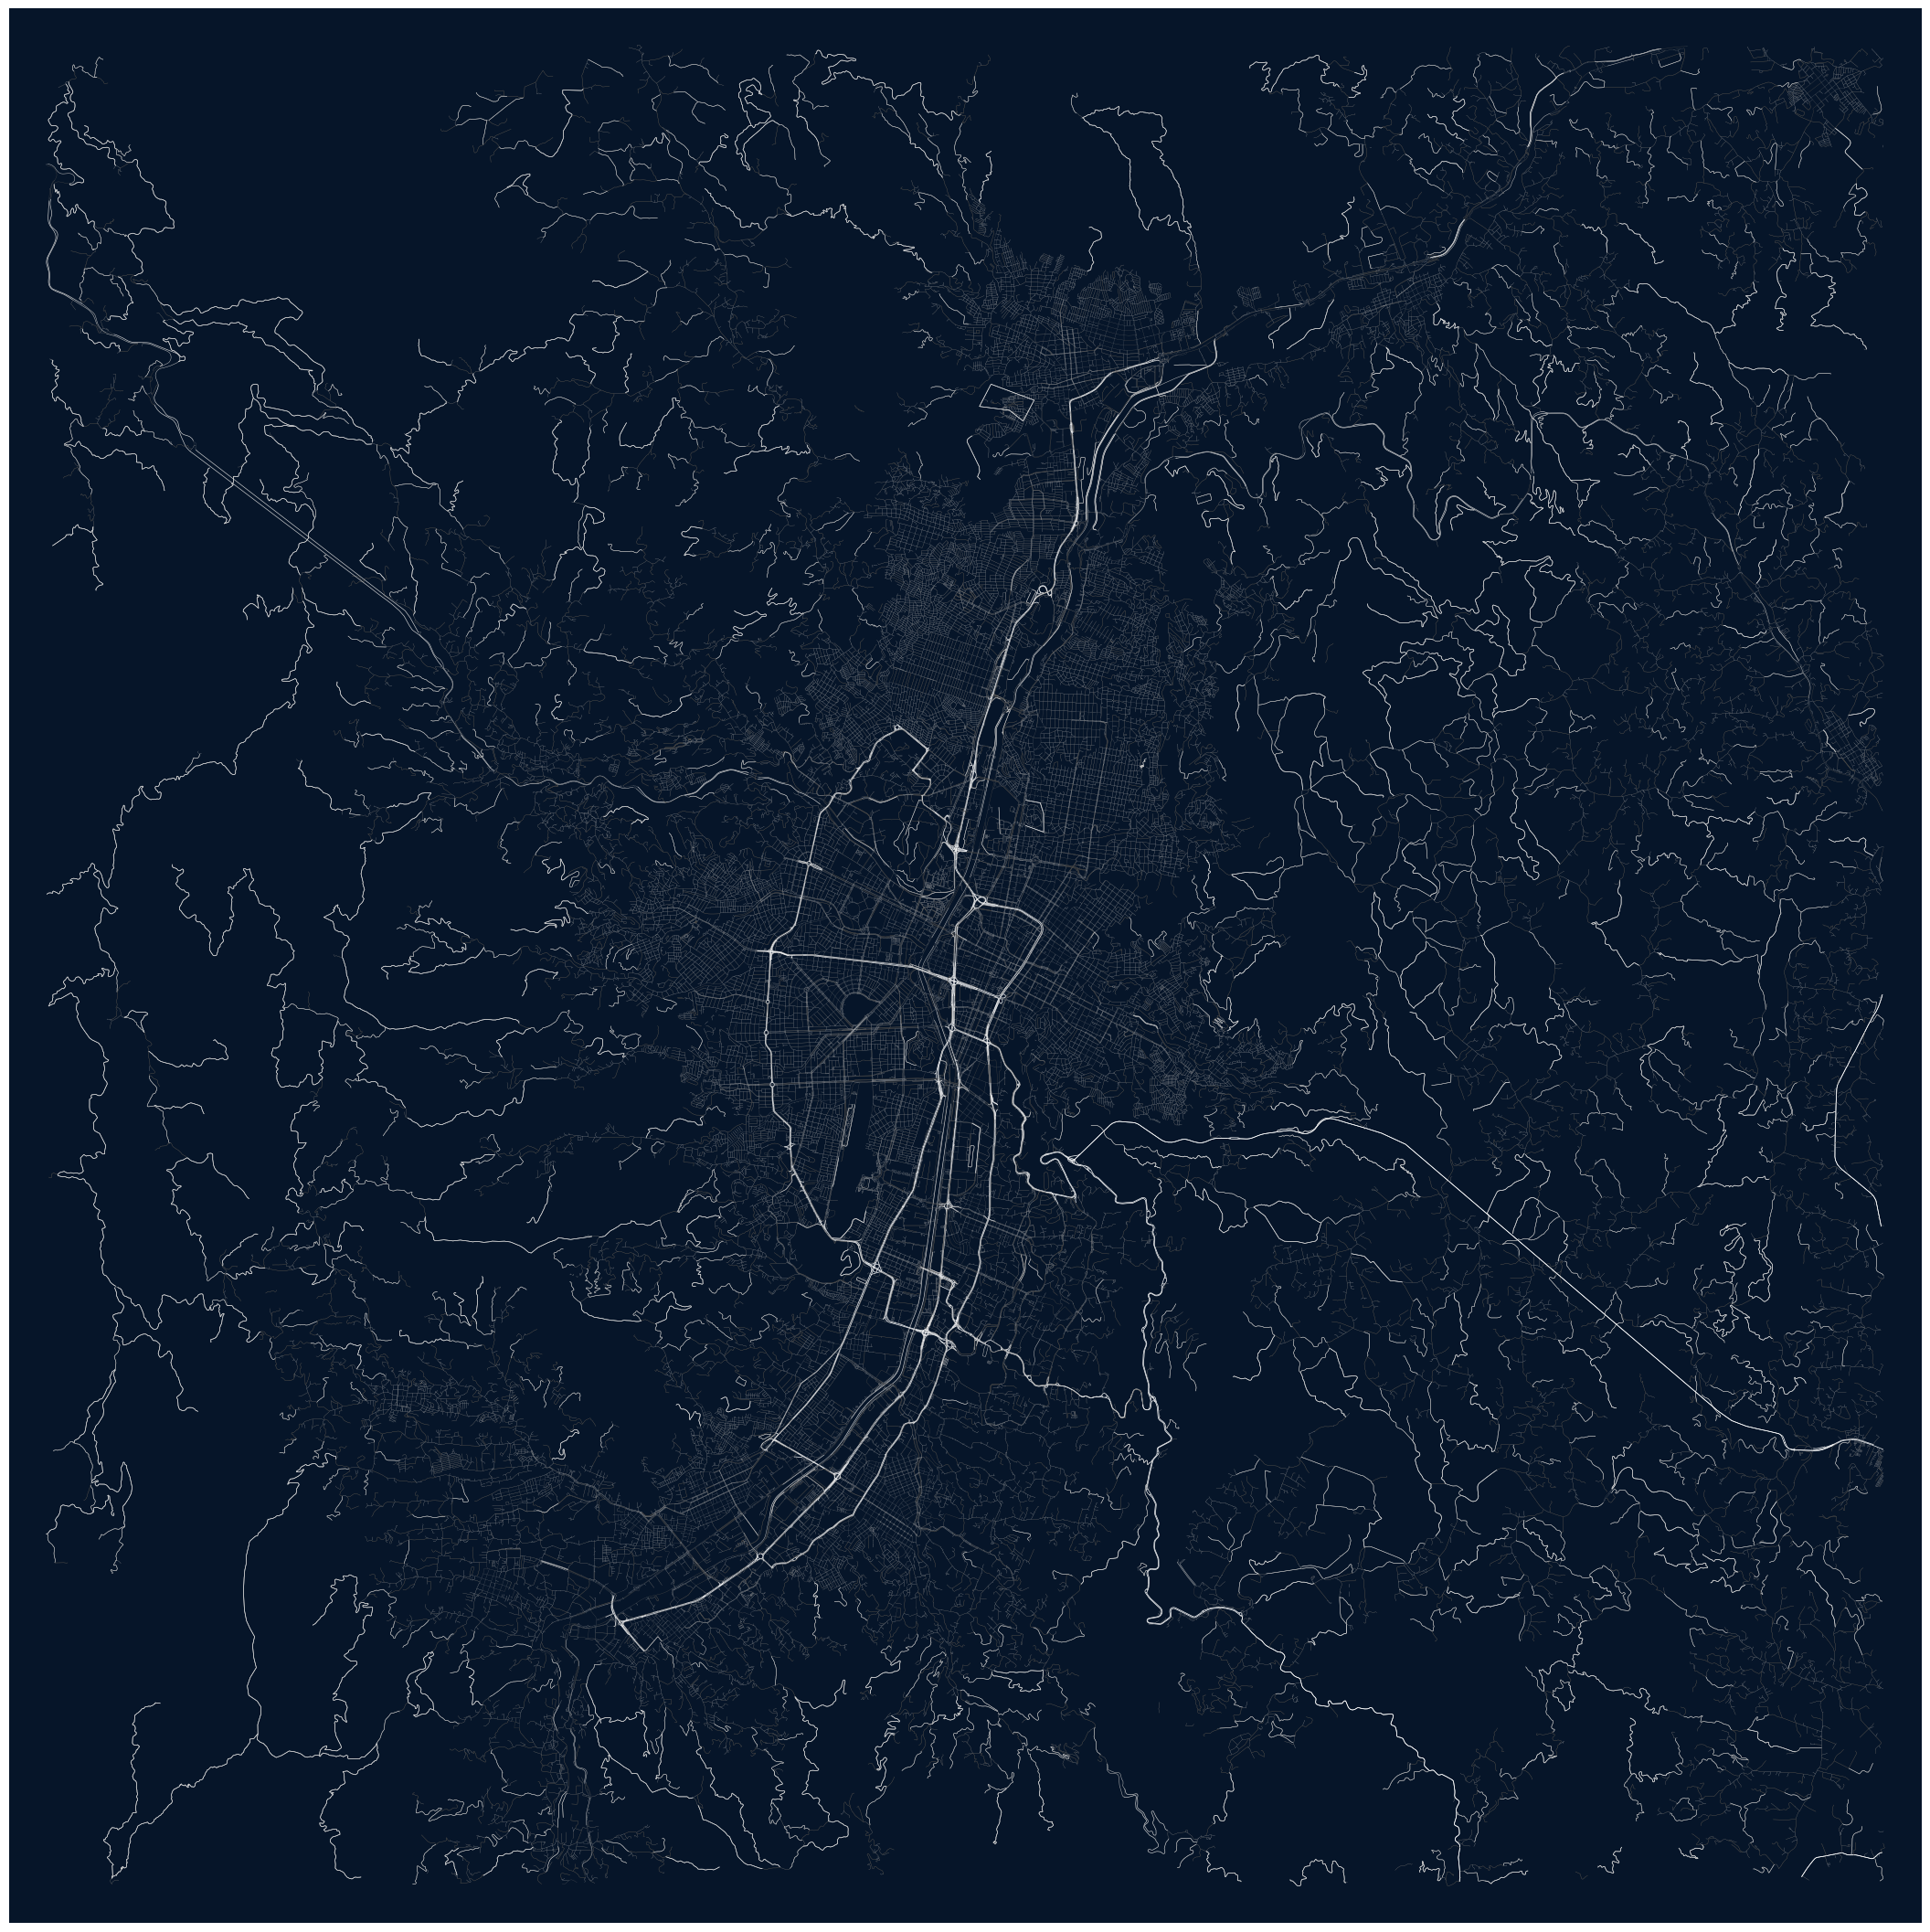

In [19]:
fig, ax = ox.plot_graph(G, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)

fig.savefig("MedellinPoster.png", dpi=300, format="png", bbox_inches='tight',
            facecolor=fig.get_facecolor(), transparent=False)